# Python

#  Data cleaning/EDA
## Considerations
### Big Data vs Small Data

Before starting consider if the data is **'small'** data or **'big'** data.  

Small data is typically:
-  Collected for the purpose at hand
-  Therefore structured and, relatively, complete
-  A sample or subset of the reality which is used to make generalized statements using inferential maths/stats
-  Low in quantity  
  
Big data on the other hand is typically:
- Collected as a by-product
- Unstructured and not complete
- 3/4/5/6/7/8 V's apply *:
    1. Volume (teramegagigapetabytes of it)
    - Variety (text, sound, pictures, numbers, all in x-number of formats)
    - Velocity (online-realtime and the pace of growth)
    - Veracity (little validation, often 'opinions')
    - Value (the business models are based on it)
    - Vulnerability (Lots of security and business continuity issues)
    - Viability (Lots of 'dead wood': 5% of the attributes drive 95% of the rewards)
    - Visualization (Data is best visually represented, also think of GPS data)
- May represent the complete reality.
  
EDA/cleaning for a 'small' data set will often need to be handled with care. The smaller the data set the more care needs to be taken in order to maintain an acceptable sized data set. Careful imputation of missing data will more likely need to be considered rather than just 'dropna(how='any').
  
EDA for 'big' data will likely be focused on reducing the data in terms of number of features in and/or volume of the data. A plain 'dropna' and sample data reduction are very likely venues.
  
In practice a combination of the approaches are likely. Typically the Viability V's critical data columns will have missing data which will require minute surgical imputation in order to achieve the  Value V.

**Big Data** may often be so big that it is a 'black box': it is difficult to get a sense of what goes on inside it. This may lead to application of many models and just seeing what 'works' i.e. gives the best R^2 or best recall. A verification of the result 'making sense' is always required and make sure you have a 'baseline' which a model needs to beat. Check-out http://tylervigen.com/spurious-correlations



(*Dawn. E Holmes, Big Data, A Very Short Introduction, Oxford University Press, 2017)

### Purpose of the analysis/model

It makes a difference if you are modeling the likelihood of some fatal decease or trying to determine the 'who to target' for a marketing campaign based on webtraffic. In the first case careful, well documented, micro data cleaning/prep is required. In the latter case it may fine to ruthlessly drop 30K out of 100K records and run a LassoCV blindly.

### Lesson from EliteDataScience:
 "Finally, remember that better data beats fancier algorithms. In applied machine learning, algorithms are commodities because you can easily switch them in and out depending on the problem. However, effective exploratory analysis, data cleaning, and feature engineering can significantly boost your results."
https://elitedatascience.com/machine-learning-algorithms

In [2]:
import numpy as np
import pandas as pd

## Getting data
### Importing
### Webscraping
## Intitial EDA

In [3]:
data = {'Col0' : ['row1', 'row2','row3', 'row4', 'row5', 'row6', 'row_7', 'row_8', 'Row9', 'Row10'],
        'Col1' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
       'col2' : [1.1, 2.2, 3.3, 4.4, np.NaN, 6.6, 7.7, 8.8, np.NaN, 100.10],
       'col3' : [-4, -3, -2, -1, 0, 1, 2, 'Nan', 4, 5],
       'col_a' : ['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh', 'iii', 'jjj'],
       'col_b' : ['red', 'blue', 'green', 'orange', np.NaN, 'purple', 'white', 'black', 'brown', 'gray'],
        'colc' : [np.NaN,'square','square', 'circle', 'circle', '???', 'triangle', 'triangle', 'triangle','triangle'],
       'ycol' : [True, True, True, True, True, False, False, False, False, False],
       'col4' : ['excellent', 'excellent', 'very good', 'very good', 'good', 'good', 'fair', 'fair', 'appalling', 'appalling']}
df = pd.DataFrame(data)
df

,Col0,Col1,col2,col3,col_a,col_b,colc,ycol,col4
0,row1,1,1.1,-4,aaa,red,NaN,True,excellent
1,row2,2,2.2,-3,bbb,blue,square,True,excellent
2,row3,3,3.3,-2,ccc,green,square,True,very good
3,row4,4,4.4,-1,ddd,orange,circle,True,very good
4,row5,5,NaN,0,eee,NaN,circle,True,good
5,row6,6,6.6,1,fff,purple,???,False,good
6,row_7,7,7.7,2,ggg,white,triangle,False,fair
7,row_8,8,8.8,Nan,hhh,black,triangle,False,fair
8,Row9,9,NaN,4,iii,brown,triangle,False,appalling
9,Row10,10,100.1,5,jjj,gray,triangle,False,appalling


In [285]:
df.shape

(10, 9)

In [286]:
df.columns

Index(['Col0', 'Col1', 'col2', 'col3', 'col4', 'col_a', 'col_b', 'colc',
       'ycol'],
      dtype='object')

In [287]:
df.dtypes

Col0      object
Col1       int64
col2     float64
col3      object
col4      object
col_a     object
col_b     object
colc      object
ycol        bool
dtype: object

In [288]:
df.head()

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True


In [289]:
df.tail()

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False


In [290]:
df.sample(5)

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
2,row3,3,3.3,-2,very good,ccc,green,square,True
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
5,row6,6,6.6,1,good,fff,purple,???,False


In [291]:
df.describe(include='all')

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
count,10,10.00000,8.000000,10,10,10,9,9,10
unique,10,NaN,NaN,10,5,10,9,4,2
top,row5,NaN,NaN,Nan,excellent,hhh,orange,triangle,True
freq,1,NaN,NaN,1,2,1,1,4,5
mean,NaN,5.50000,5.525000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.02765,3.260039,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00000,1.100000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.25000,3.025000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.50000,5.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.75000,7.975000,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
#Initial EDA
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(df)
dfs.columns_stats # select suspect columns

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
counts,10,10,8,10,10,10,9,9,10
uniques,10,10,8,10,5,10,9,4,2
missing,0,0,2,0,0,0,1,1,0
missing_perc,0%,0%,20%,0%,0%,0%,10%,10%,0%
types,unique,numeric,numeric,unique,categorical,unique,unique,categorical,bool


In [293]:
dfs.summary() # inspect the suspects

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
count,NaN,10,8,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.5,5.525,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.02765,3.26004,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1,1.1,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.25,3.025,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.5,5.5,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.75,7.975,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,10,10.1,NaN,NaN,NaN,NaN,NaN,NaN
counts,10,10,8,10,10,10,9,9,10
uniques,10,10,8,10,5,10,9,4,2


/anaconda3/lib/python3.6/site-packages/pandas_summary/__init__.py:130: RuntimeWarning: invalid value encountered in minimum
  capped_series = np.minimum(series, series.mean() + multiplier * series.std())
/anaconda3/lib/python3.6/site-packages/pandas_summary/__init__.py:143: RuntimeWarning: invalid value encountered in minimum
  capped_series = np.minimum(series, series.median() + multiplier * series.mad())


mean                                              5.525
std                                             3.26004
variance                                        10.6279
min                                                 1.1
max                                                10.1
5%                                                1.485
25%                                               3.025
50%                                                 5.5
75%                                               7.975
95%                                               9.645
iqr                                                4.95
kurtosis                                       -1.53496
skewness                                      0.0361315
sum                                                44.2
mad                                               2.775
cv                                             0.590052
zeros_num                                             0
zeros_perc                                      

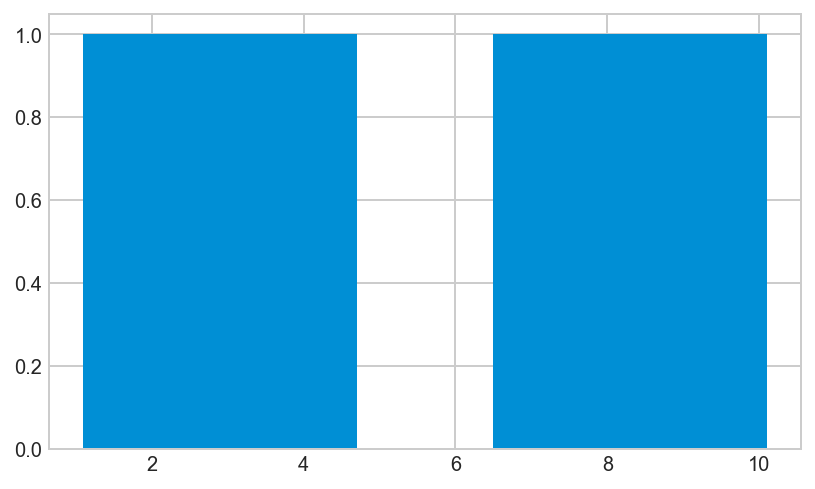

In [294]:
dfs['col2'] # detail the suspects

### Summerizing the data
#### Numericals:  Excel-like pivot tables

In [35]:
import datetime
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 6,
                   'B': ['A', 'B', 'C'] * 8,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 4,
                    'D': np.random.randn(24),
                    'E': np.random.randn(24),
                    'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)] +
                        [datetime.datetime(2013, i, 15) for i in range(1, 13)]}) 
pd.pivot_table(df, values='D', index=['B'], columns=['A', 'C'], aggfunc=np.mean)

A       one               three                 two          
C       bar       foo       bar       foo       bar       foo
B                                                            
A -0.390121 -1.029110 -0.407056       NaN       NaN -1.525414
B -0.151084 -0.634303       NaN -0.171391  0.647781       NaN
C -1.513407  0.011371  0.484489       NaN       NaN  0.728589

In [300]:
table = pd.pivot_table(df, values='D', index=pd.Grouper(freq='M', key='F'), columns='C')
print(table.to_string(na_rep=''))

C                bar       foo
F                             
2013-01-31           -0.225452
2013-02-28            1.599149
2013-03-31            0.023529
2013-04-30  0.082984          
2013-05-31 -0.257222          
2013-06-30  0.732963          
2013-07-31           -0.855990
2013-08-31           -0.449770
2013-09-30            0.306523
2013-10-31  1.109703          
2013-11-30  1.258868          
2013-12-31 -1.329054          


#### Categoricals: Old-fashioned Cross-Tabs

In [303]:
#counts
foo, bar, dull, shiny, one, two = 'foo', 'bar', 'dull', 'shiny', 'one', 'two'
a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)
b = np.array([one, one, two, one, two, one], dtype=object)
c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     0    0     1
foo    2     1    1     0

In [305]:
#percentages
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'], normalize=True)

b         one                 two          
c        dull     shiny      dull     shiny
a                                          
bar  0.166667  0.000000  0.000000  0.166667
foo  0.333333  0.166667  0.166667  0.000000

## Real world: Imperfect data

### Target(y) is skewed
- Apply log Transformation
- Models less sensitive to this problem:
    - KNN (Regressor/Classifier)
    - (Boosted) Forest/Trees

### Non-linear relationships
- Apply Polynomial transformations
- Models less sensitive to this problem:
    - (Boosted) Forest/Trees
    
### Imbalanced (y) in data sets
- Adjust **training** data set; sklearn.imbalanced-learn
    - Under-sampling(1 large category among smaller ones)
    - Over-sampling(1 small category among larger ones)
    - Hybrid  
I.e. the model is trained on the synthetically balanced set and tested on the originally unbalance test set.
    **Note** set stratify=True @ train/test split; this ensures that all splits have the same y category/value distribution.
    
- Models less sensitive to this problem:

    - AdaBoost
    - Naieve Bayes
    
### Too many features
Typically NLP

- Extract
    - Principle Component Analysis
    - Linear Discriminant Analysis
- Select
    - Correlation Thresholds  
    Only choose the features with the highest correlation/predictive value
    - Variance thresholds  
    Eliminate any feature where the majority of observations have the same value
    (different from Co-variance)
- Models with built in feature selection
    - Lasso Regression (Unimportant features get a 0 coefficient)
    - Random forests/decisions trees (feature that do not add information get left out)
    
## Cleaning

### Intitial Validation 

### Outliers

Wikipedia: "an outlier is an observation point that is distant from other observations"  
Considerations:
-  Purpose of the analysis
    - Predicting anomalies/Black Swans, e.g. detecting fraud:    
    outliers are a blessing
    - Predicting averages e.g. average house prices  
    It is a common practice to limit the dataset to the mean +/- 2 or 3 std's on key independent variables
-  Number of outliers vis a vis the quantity of data
-  Overall data quality
-  Type of model likely to be applied, some models e.g regression are sensitive to outliers.

**note:** Categorical data may also have outliers: an 'outlier' category will have a frequency of a different magnitude than the others(e.g. {FavoriteColorBlue : 1000, FavoriteColorRed :2000, FavoriteColorMauve: 5}

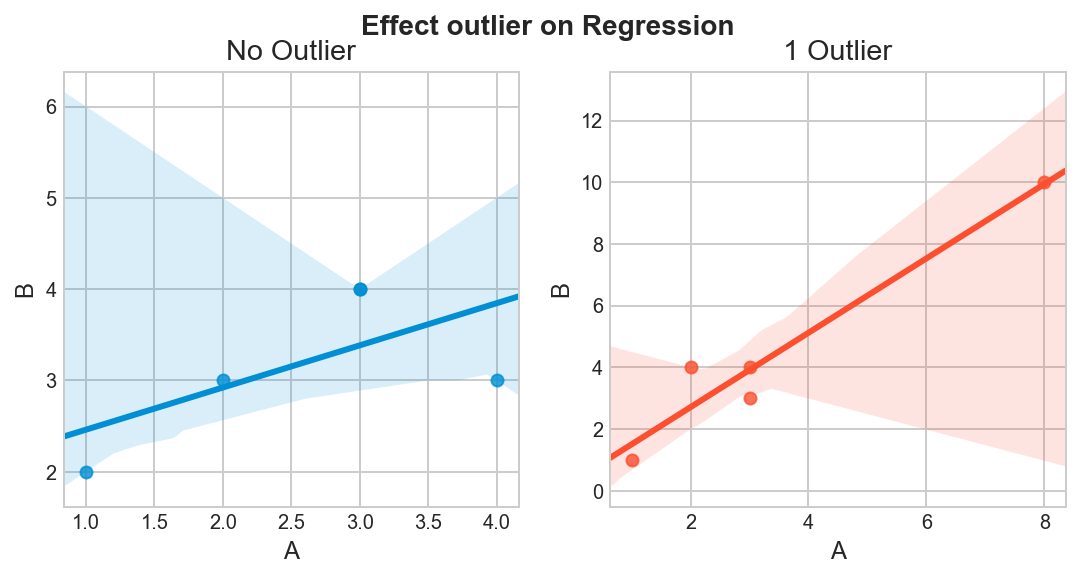

In [87]:
df_ = pd.DataFrame({'A': [1, 2, 3, 3, 4], 'B': [2, 3, 4, 4, 3]})
df = pd.DataFrame({'A': [1, 3, 2, 3, 8], 'B': [1, 3, 4, 4, 10]})
import seaborn as sns
fig, axs = plt.subplots(ncols=2,figsize=(8,4))

sns.regplot(x='A', y='B', data=df_, ax=axs[0])
axs[0].set_title("No Outlier")
sns.regplot(x='A', y='B', data=df, ax=axs[1])
axs[1].set_title("1 Outlier")
fig.suptitle('Effect outlier on Regression', fontsize=14, fontweight='bold')

plt.show()
# it took me 2 hours to figure out sns.lmplots cannot be subplotted

#### Identify outliers
##### Visually by plotting
##### Filtering
- Z scores
- Medians

##### More Advanced methodologies

- DBScan
- Isolation Forest

#### Establish the cause of the outlier
For all outliers the cause should be established. Or rather, error as a cause should be ruled out. Outliers should be 'presumed innocent until proven guilty'. Sources of error include:
    -  (Manual) Input error
    -  Error in interface/conversion
    -  Malfunction of the recording technology (chain)

##### Error

If an error is established:
1. Correct if possible
2. Treat as NaN

##### True outlier

Course of action is determined by the **purpose of the model/analysis** 

- Anomaly detection/prediction 
- Focus on prediction of averages
- Overall data quality
- Susceptibility for outliers of the anticipated models

In [45]:
avg = df['col2'].mean()
dev = df['col2'].std()
outlmin = avg - 2 * dev
outlmax = avg + 2 * dev
mask = df['col2'] > outlmax #df['col2'] < outlmin]
df = df[~mask]
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False


In [47]:
df[df['col2'] < 3 * df['col2'].mean()]


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False


In [86]:
df[df['col2'] < df['col2'].mean() + 2 * df['col2'].std() or df['col2'] > df['col2'].mean() - 2 * df['col2'].std()]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [48]:
def reject_outliers(data, m):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

data= df.col2
df.index = reject_outliers(data,2).index


ValueError: Length mismatch: Expected axis has 9 elements, new values have 7 elements

In [76]:
ys = df['col2']
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    x = np.where((ys > upper_bound) | (ys < lower_bound))
    return print(x)

In [78]:
np.percentile(ys, [25, 75])

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


array([nan, nan])

In [39]:
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


### Missing data

Considerations:

-  Volume of the data
-  Origin/nature of the data (e.g. sample of tweets  vs a scientific experiment)
-  Phase in the modeling process(e.g. initial stages vs final feature selection)
-  Are NaN's likely to occur in production?

Essentially 3 strategies. 
1.  Dropping  
Common 'Big Data' approach. If data is ambundant. NaN's low in volume. During initial stage of the modeling.
2.  Imputing  
Traditional 'Small Data' approach. Low data volumes, NaN's low in volume
3.  Categorizing  
Considers the presence of NaN's to hold information by its virtue. Dropping or Imputing will lose this information. (e.g. certain age groups may be more hesitant to state their age. By dropping the records the specific age group may be underrepresented)

By using this technique of flagging and filling, you are essentially allowing the algorithm to estimate the optimal constant for 'missingness', instead of just filling it in with the mean.
  
Additional advantage is that this makes a productionalized model more robust as it will allow for NaN's (e.g. even if somebody does in fill in her age the model can still predict)



#### Identify missing data


In [79]:
df__ = df.isnull().sum(axis=1) # by index (by row in db terms)
df_ = df.isnull().sum()
print(df__, df_)

0    1
1    0
2    0
3    0
4    2
5    0
6    0
7    0
8    1
9    0
dtype: int64 Col0     0
Col1     0
col2     2
col3     0
col4     0
col_a    0
col_b    1
colc     1
ycol     0
dtype: int64


Decide if there are other values that should be considered 'null' or NaN. These may include: '?', 999(as an integer), ' ' (space). In a wider sense: anything that is not appropriate for the purpose of variable. E.g. the variable 'sex' may include the answer 'yes, please!', although a KNN will likely impute in a 14 year old male, it is best to regard this joker as a np.NaN .
<br><br>
It may be tricky to identify these, check the data dictionary. If not available do a value count on objects (not for NLP obviously)

In [80]:
df['colc'].value_counts()

triangle    4
square      2
circle      2
???         1
Name: colc, dtype: int64

Numeric columns replace the identified missing values with np.NaN

For object columns, it is a little more tricky technically. For Python string operations do not like np.NaN's.
    1. identify missing values
    2. replace the strings with a generic string 
    3. convert generic string to np.NaN
    4. Convert column to integer/

### Dropna

The classic 'Big Data' approach; 

In [81]:
# Dropping all rows with an(y) NA
df.dropna(axis=0)

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


In [82]:
# Dropping columns
df.dropna(axis=1)

,Col0,Col1,col3,col4,col_a,ycol
0,row1,1,-4,excellent,aaa,True
1,row2,2,-3,excellent,bbb,True
2,row3,3,-2,very good,ccc,True
3,row4,4,-1,very good,ddd,True
4,row5,5,0,good,eee,True
5,row6,6,1,good,fff,False
6,row_7,7,2,fair,ggg,False
7,row_8,8,Nan,fair,hhh,False
8,Row9,9,4,appalling,iii,False
9,Row10,10,5,appalling,jjj,False


Nifty trick: df.dropna(axis=1, thres=3), defines the acceptable number of NaN's along the axis

### Imputing
#### SKlearn Impute
Fits into pipelines

In [255]:
# by row
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(axis=1, copy=True, missing_values='NaN', strategy='mean', verbose=10)
X = [[np.nan, 2], [6, np.nan], [7, 6]]
imp.fit(X)
print(imp.transform(X))                           

[[2. 2.]
 [6. 6.]
 [7. 6.]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [256]:
#by column
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values='NaN', strategy='mean')
X = [[np.nan, 2], [6, np.nan], [7, 6]]
imp.fit(X)
print(imp.transform(X))           

[[6.5 2. ]
 [6.  4. ]
 [7.  6. ]]


**Note** Check imputing modus for cats

In SKLearn 0.20 a ChainedImputer will be included which has more advanced features, like using models for determining the best value for the NA

#### Pandas 
##### Fillna

In [67]:
df.fillna(2) #fills with integer 2

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,2,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,5.5,0,good,eee,2,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,9.9,4,appalling,iii,brown,triangle,False
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False


In [68]:
df.fillna(method='ffill') #repeats last value before NaN

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,5.5,0,good,eee,orange,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,9.9,4,appalling,iii,brown,triangle,False
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False


In [69]:
df.fillna(method='bfill') #repeats first value after NaN

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,square,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,5.5,0,good,eee,purple,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,9.9,4,appalling,iii,brown,triangle,False
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False


In [72]:
df['col2'] = df['col2'].fillna(df['col2'].mean()) # fill with mean for the column
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.100,-4,excellent,aaa,red,NaN,True
1,row2,2,2.200,-3,excellent,bbb,blue,square,True
2,row3,3,3.300,-2,very good,ccc,green,square,True
3,row4,4,4.400,-1,very good,ddd,orange,circle,True
4,row5,5,5.525,0,good,eee,NaN,circle,True
5,row6,6,6.600,1,good,fff,purple,???,False
6,row_7,7,7.700,2,fair,ggg,white,triangle,False
7,row_8,8,8.800,Nan,fair,hhh,black,triangle,False
8,Row9,9,5.525,4,appalling,iii,brown,triangle,False
9,Row10,10,10.100,5,appalling,jjj,gray,triangle,False


In [114]:
df[['col3', 'colc']].replace(['???', 'Nan'], np.nan, inplace=True) #replace strings with np.nan
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False


#### Interpolation

In [71]:

df['col3'] = df['col3'].astype(float)
df['col3'] = df['col3'].interpolate(axis=0)#, inplace=True)
df
#df.interpolate(axis=1, limit=2, inplace=True)

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4.0,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3.0,excellent,bbb,blue,square,True
2,row3,3,3.3,-2.0,very good,ccc,green,square,True
3,row4,4,4.4,-1.0,very good,ddd,orange,circle,True
4,row5,5,NaN,0.0,good,eee,NaN,circle,True
5,row6,6,6.6,1.0,good,fff,purple,???,False
6,row_7,7,7.7,2.0,fair,ggg,white,triangle,False
7,row_8,8,8.8,3.0,fair,hhh,black,triangle,False
8,Row9,9,NaN,4.0,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5.0,appalling,jjj,gray,triangle,False


#### KNN Classifier/Regressor(or any other model for that matter)

It is very feasible to use a predictive model for imputation. Careful not to build a 'model on a model' KNN is a likely (but slow) candidate. In fact it can be done with any other predictor other than Tarot cards. Outline is as follows:
    1. Split the df in 2 parts:
        1. With the NaN's
        2. Without the NaN's
    2. Define your y as the missing values column
    3. Define X as the columns to use for prediction. Make sure to **not include** i.e. **exclude** the ultimate target
    4. In case of a classifier: determine the baseline i.e. the largest majority class
    5. Scale your X
    6. Fit the model (use CrossVal, GridSearch as deemed appropriate for the purpose)
    7. Evaluate the model (R^2 or compare to baseline)
    8. Decide what to do
        1. Take the mean/median for continuous data
        2. Take the mode for discrete
    9. Predict the NaN's
    10. merge the 2 df's again
Good solution if missing value can be easily derived
    
    

In [164]:
df_imp = pd.read_excel('ImputKnn.xls',na_values='NaN')
df_imp

,col1,col2,col3,col4,col5,col6
0,10.0,4,4,6,90,1
1,10.0,4,5,6,100,1
2,NaN,4,5,6,90,1
3,10.0,7,8,9,100,0
4,20.0,4,5,6,90,0
5,20.0,7,8,8,102,0
6,20.0,7,8,8,90,1
7,NaN,7,8,9,106,1
8,20.0,11,12,13,100,1
9,30.0,14,15,16,90,0


In [165]:
#Split df on NaN's
impute_missing = df_imp.loc[df_imp['col1'].isnull(), :]
impute_valid = df_imp.loc[~df_imp['col1'].isnull(), :]

In [166]:
#define pred columns
pred_cols = [c for c in impute_valid.columns if not c in ['col6', 'col1']]
y = impute_valid['col1'].values
X = impute_valid[pred_cols]

In [167]:
#train model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
ss = StandardScaler()
Xs = ss.fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
scores = cross_val_score(knn, Xs, y, cv=2)
print (scores)
print (np.mean(scores))

[0.66666667 0.6       ]
0.6333333333333333


In [168]:
#fit on valid and predict missing
knn.fit(Xs,y)
y = impute_missing['col1'].values
Xp = impute_missing[pred_cols]
ss = StandardScaler()
Xp = ss.fit_transform(Xp)

In [171]:
#impute missing
impute_missing['col1'] = knn.predict(Xp)
df_imp.loc[df_imp['col1'].isnull(), 'col1'] = impute_missing['col1']
df_imp

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AttributeError: 'function' object has no attribute 'loc'

### Categorizing

Considers that the presence of a NaN may hold information by itself. 

-  Introducing a category "missing" for categorical data.
-  introduce a dummy 'missing' per column with missing integers. Put the value to 1 and the original column to 0. Include the 'missing' column in your X

By using this technique of flagging and filling, you are essentially allowing the algorithm to estimate the optimal constant for missingness, instead of just filling it in with the mean or sropping it.
  
Additional advantage is that this makes a productionalized model more robust.



### The opposite of Missing Data
#### Functional
It is also possible that there is 'too much' data. 

In [25]:
# Dropping duplicate rows
df.drop_duplicates()

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,5.5,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,9.9,4,appalling,iii,brown,triangle,False
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False


In [ ]:
#rename column
dfc['testcat'] = 'ReadComp'
#create a helper column, to ID the cases that a pupil has taken the test more than once 
dfc['helper'] = dfc['name']+dfc['DL']#Only include the last test result
dfc.drop_duplicates(subset='helper', keep='last', inplace = True)
#delete helper
dfc.drop(['helper'], axis=1, inplace=True)

Multiple entries in the same category/period. In combination with targeted/grouped sorting and, possibly, a temporary helper column, using drop_duplicated(keep = 'first') or 'last' may lead to single entries.
<br><br>
Argmax over the columns

#### Non-Functional

If you have an enormous dataset which cripples you computer, it is perfectly fine to take a random sample; you can/should always validate based on the entire dataset later; or get your AWS set up going

In [73]:
df_sample = df.sample(5)
df_sample

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
5,row6,6,6.6,1,good,fff,purple,???,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True


## Linear
## Non-linear

# Modeling
## Model selection

## Preprocessing

Data will need to be preprocessed for the models to work. Essentially all text needs to be transformed to integers for the models to work. The applies to language as well as categorical data. Although not all models require it, it is best practice to scale the X data. In some cases normalization is required.  
**Notes**   
Text cleaning is considered data cleaning.  
While some SKlearn models will handle NaN's and for quick and dirty prototyping this can be acceptable. Complete data cleaning is assumed here.

### Text

### Categoricals

#### Encoding

In [72]:
data = {'Col0' : ['row1', 'row2','row3', 'row4', 'row5', 'row6', 'row_7', 'row_8', 'Row9', 'Row10'],
        'Col1' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
       'col2' : [1.1, 2.2, 3.3, 4.4, np.NaN, 6.6, 7.7, 8.8, np.NaN, 100.10],
       'col3' : [-4, -3, -2, -1, 0, 1, 2, 'Nan', 4, 5],
       'col_a' : ['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh', 'iii', 'jjj'],
       'col_b' : ['red', 'blue', 'green', 'orange', np.NaN, 'purple', 'white', 'black', 'brown', 'gray'],
        'colc' : [np.NaN,'square','square', 'circle', 'circle', '???', 'triangle', 'triangle', 'triangle','triangle'],
       'ycol' : [True, True, True, True, True, False, False, False, False, False],
       'col4' : ['excellent', 'excellent', 'very good', 'very good', 'good', 'good', 'fair', 'fair', 'appalling', 'appalling']}
df = pd.DataFrame(data)
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,100.1,5,appalling,jjj,gray,triangle,False


##### Ordinals

Ordinal variables are categorical variables where order matters and an integer value may have a meaning. E.g. 1 to 5 stars, S/M/L T-shirt sizes. Unfortunately SkLearn preprocessors do not deliver any working solution (the sklearn.preprocessing.CategoricalEncoder was planned for  scikit-learn 0.20 but was pulled). Below the Python and the Pandas routes.
  
Obviously this approach is not sound statistically however it is a common practice and often produces meaningful results.

In [174]:
#Python
def item_category_maker(x):
    x = x.lower() #force lowercase
    if 'excellent' in x:
        return 5
    elif 'very good' in x :
        return 4
    elif 'good' in x:
        return 3
    elif 'fair' in x:
        return 2
    elif 'appalling' in x:
        return 1
    else:
        return 0 # have a left over answer
    
df['col5'] = df['col4'].map(item_category_maker)
print(df['col5'].unique())
print(df['col5'].value_counts())
df

[5 4 3 2 1]
5    2
4    2
3    2
2    2
1    2
Name: col5, dtype: int64


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col5
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True,5
1,row2,2,2.2,-3,excellent,bbb,blue,square,True,5
2,row3,3,3.3,-2,very good,ccc,green,square,True,4
3,row4,4,4.4,-1,very good,ddd,orange,circle,True,4
4,row5,5,NaN,0,good,eee,NaN,circle,True,3
5,row6,6,6.6,1,good,fff,purple,???,False,3
6,row_7,7,7.7,2,fair,ggg,white,triangle,False,2
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False,2
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False,1
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False,1


In [8]:
#Pandas
df['col6'] = 0
df.loc[df['col4'] == 'excellent', 'col6'] = 5
df.loc[df['col4'] == 'very good', 'col6'] = 4
df.loc[df['col4'] == 'good', 'col6'] = 3
df.loc[df['col4'] == 'fair', 'col6'] = 2
df.loc[df['col4'] == 'appalling', 'col6'] = 1
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col6
0,row1,1,1.1,-4,excellent,aaa,red,square,True,5
1,row2,2,2.2,-3,excellent,bbb,blue,square,True,5
2,row3,3,3.3,-2,very good,ccc,green,square,True,4
3,row4,4,4.4,-1,very good,ddd,orange,circle,True,4
4,row5,5,5.5,0,good,eee,yellow,circle,True,3
5,row6,6,6.6,1,good,fff,purple,circle,False,3
6,row_7,7,7.7,2,fair,ggg,white,triangle,False,2
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False,2
8,Row9,9,9.9,4,appalling,iii,brown,triangle,False,1
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False,1


##### Nominal categorical

Order does not matter and the value assigned has no significance, may be used in classifiers. Dummify/OneHotEncode for regressors   
  ** Note: ** Drop_first will ensure independence and avoid collinearity 

In [64]:
#SKLearn
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
encoder = ce.OneHotEncoder(cols=['col4'])
# encoder = ce.OrdinalEncoder(cols=['col4'])
#encoder = ce.OrdinalEncoder(cols=['col4'])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])

df_clean = encoder.fit_transform(df)
df_clean = df_clean.drop(['col4_1'], axis=1) #drop_first
df_clean

,col4_2,col4_3,col4_4,col4_5,col4_-1,Col0,Col1,col2,col3,col_a,col_b,colc,ycol
0,0,0,0,0,0,row1,1,1.1,-4,aaa,red,NaN,True
1,0,0,0,0,0,row2,2,2.2,-3,bbb,blue,square,True
2,1,0,0,0,0,row3,3,3.3,-2,ccc,green,square,True
3,1,0,0,0,0,row4,4,4.4,-1,ddd,orange,circle,True
4,0,1,0,0,0,row5,5,5.5,0,eee,NaN,circle,True
5,0,1,0,0,0,row6,6,6.6,1,fff,purple,???,False
6,0,0,1,0,0,row_7,7,7.7,2,ggg,white,triangle,False
7,0,0,1,0,0,row_8,8,8.8,Nan,hhh,black,triangle,False
8,0,0,0,1,0,Row9,9,9.9,4,iii,brown,triangle,False
9,0,0,0,1,0,Row10,10,10.1,5,jjj,gray,triangle,False


In [19]:
#Pandas
df_clean = pd.get_dummies(data=df, columns=['col4'], prefix_sep= '_', drop_first=True)
df_clean

,Col0,Col1,col2,col3,col_a,col_b,colc,ycol,col5,col4_excellent,col4_fair,col4_good,col4_very good
0,row1,1,1.1,-4,aaa,red,square,1,5,1,0,0,0
1,row2,2,2.2,-3,bbb,blue,square,1,5,1,0,0,0
2,row3,3,3.3,-2,ccc,green,square,1,4,0,0,0,1
3,row4,4,4.4,-1,ddd,orange,circle,1,4,0,0,0,1
4,row5,5,5.5,0,eee,yellow,circle,1,3,0,0,1,0
5,row6,6,6.6,1,fff,purple,circle,0,3,0,0,1,0
6,row_7,7,7.7,2,ggg,white,triangle,0,2,0,1,0,0
7,row_8,8,8.8,Nan,hhh,black,triangle,0,2,0,1,0,0
8,Row9,9,9.9,4,iii,brown,triangle,0,1,0,0,0,0
9,Row10,10,10.1,5,jjj,gray,triangle,0,1,0,0,0,0


For classifiers a categoriser is a better option

In [5]:
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
# encoder = ce.OneHotEncoder(cols=['col4'])
# encoder = ce.OrdinalEncoder(cols=['col4'])
encoder = ce.OrdinalEncoder(cols=['col4'])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])

df_clean = encoder.fit_transform(df)
# X_cleaned = encoder.transform(X_dirty)
df_clean

,Col0,Col1,col2,col3,col_a,col_b,colc,ycol,col4
0,row1,1,1.1,-4,aaa,red,square,True,1
1,row2,2,2.2,-3,bbb,blue,square,True,1
2,row3,3,3.3,-2,ccc,green,square,True,2
3,row4,4,4.4,-1,ddd,orange,circle,True,2
4,row5,5,5.5,0,eee,yellow,circle,True,3
5,row6,6,6.6,1,fff,purple,circle,False,3
6,row_7,7,7.7,2,ggg,white,triangle,False,4
7,row_8,8,8.8,Nan,hhh,black,triangle,False,4
8,Row9,9,9.9,4,iii,brown,triangle,False,5
9,Row10,10,10.1,5,jjj,gray,triangle,False,5


##### Booleans

While most models will handle booleans out of the box for consistency purposes these may be encoded. **note** When creating 2 separate columns drop 1

In [10]:
df['ycol'] = df['ycol']*1
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col6,col5
0,row1,1,1.1,-4,excellent,aaa,red,square,1,5,5
1,row2,2,2.2,-3,excellent,bbb,blue,square,1,5,5
2,row3,3,3.3,-2,very good,ccc,green,square,1,4,4
3,row4,4,4.4,-1,very good,ddd,orange,circle,1,4,4
4,row5,5,5.5,0,good,eee,yellow,circle,1,3,3
5,row6,6,6.6,1,good,fff,purple,circle,0,3,3
6,row_7,7,7.7,2,fair,ggg,white,triangle,0,2,2
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,0,2,2
8,Row9,9,9.9,4,appalling,iii,brown,triangle,0,1,1
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,0,1,1


#### Under sampling
#### Oversampling
### Numericals

#### Nominals

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,NaN,0,good,eee,NaN,circle,True
5,row6,6,6.6,1,good,fff,purple,???,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False


In [192]:
df = pd.DataFrame(data)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X = df.Col1.values.reshape(-1, 1)
print(pt.fit)
df['col8'] = pt.fit_transform(X)
df['col9'] = pt.inverse_transform(X)
df



<bound method PowerTransformer.fit of PowerTransformer(copy=True, method='box-cox', standardize=True)>


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col8,col9
0,row1,1,1.1,-4,excellent,aaa,red,NaN,True,-1.721156,8.426320
1,row2,2,2.2,-3,excellent,bbb,blue,square,True,-1.238164,11.972051
2,row3,3,3.3,-2,very good,ccc,green,square,True,-0.820980,15.839480
3,row4,4,4.4,-1,very good,ddd,orange,circle,True,-0.441503,19.990612
4,row5,5,NaN,0,good,eee,NaN,circle,True,-0.087809,24.397391
5,row6,6,6.6,1,good,fff,purple,???,False,0.246611,29.038062
6,row_7,7,7.7,2,fair,ggg,white,triangle,False,0.565809,33.895154
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False,0.872529,38.954259
8,Row9,9,NaN,4,appalling,iii,brown,triangle,False,1.168741,44.203247
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False,1.455922,49.631733


#### Polynomials

In [4]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
poly_df = pf.fit_transform([df['Col1'], df['col2']][:3])
poly_df = pd.DataFrame(poly_df, columns=pf.get_feature_names())
poly_df
#pf.get_feature_names()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import category_encoders as ce

#encoder = ce.BackwardDifferenceEncoder(cols=['Col1'])
#encoder = ce.BinaryEncoder(cols=['colc'])
#encoder = ce.HashingEncoder(cols=['col_b'])
# encoder = ce.HelmertEncoder(cols=[...])
#encoder = ce.OneHotEncoder(cols=['col4'])
# encoder = ce.OrdinalEncoder(cols=['col4'])
#encoder = ce.OrdinalEncoder(cols=['col4'])
# encoder = ce.SumEncoder(cols=['col4'])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols='col1')
# encoder = ce.TargetEncoder(cols=['colc'])
encoder = ce.LeaveOneOutEncoder(cols=['colc'])

df_clean = encoder.fit_transform(df)
# X_cleaned = encoder.transform(X_dirty)
df_clean

Good explanation of:
- encoder = ce.BackwardDifferenceEncoder(cols=['Col1'])
- encoder = ce.HelmertEncoder(cols=[...])  
- encoder = ce.SumEncoder(cols=[...])
http://psych.colorado.edu/~carey/Courses/PSYC5741/handouts/Coding%20Categorical%20Variables%202006-03-03.pdf

Create a unigue binary code for each category:
- encoder = ce.BinaryEncoder(cols=['colc'])
- encoder = ce.HashingEncoder(cols=[...])
 

encoder = ce.BaseNEncoder(cols=[...])
encoder = ce.TargetEncoder(cols=[...])
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
encoder = ce.LeaveOneOutEncoder(cols=[...])
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf


## Define X and y


In [10]:
# remove categorical features
df.drop(['col1', 'col2', 'col3'], axis=1, inplace=True)
#or dummify
pd.get_dummies(df,columns=['col1'])
#X = pd.get_dummies(X,drop_first=True) #drop_first=True if using in a model

# if you do not use patsy:
# define X and y
X = df.drop('yCol', axis=1)
# or
X = [['col1', 'col2', 'col3']] #!!!!!! [[]] 
y = df['ycol'].values
#or
X = df[[c for c in df.columns if not c in ['col1', 'col2']]]
X = df[[c for c in df.columns if c.startswith('XyZ')]]
#or with y in last column
feature_set = X  == data.iloc[:, :-1]
target = y == data.iloc[:, -1]




KeyError: "labels ['col1'] not contained in axis"

#### Scaling

Scale your X's not y: you would loose units scaling on y
Standardizes/scales centers of the data around mean 0 with std 1

** Note ** for decisions trees : scaling  y is possible(and wise!)


In [ ]:
from sklearn.preprocessing import StandardScaler
# initialize the Scaler
ss = StandardScaler()
# Fit the data using the scaler (scale the data)
X = ss.fit(X_train.values) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train = ss.transform(X_train)#transform the data sets
X_test= ss.transform(X_test)
print (X.mean(), X.std())

#In DF formate:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

#### Normalizing
Normalization forces the data between 0 and 1 

In [ ]:
from sklearn.preprocessing import Normalizer
# initialize the Scaler
nor = Normalizer()
# Fit the data using the scaler (scale the data)
X = nor.fit(X_train.values) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train = nor.transform(X_train)#transform the data sets
X_test= nor.transform(X_test)
print (X.mean(), X.std())

#In DF formate:
nor = Normalizer()
X = pd.DataFrame(nor.fit_transform(df), columns = df.columns)

### Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

NameError: name 'X' is not defined

## Processing

### Regressors

#### Intro

Points hold true for all linear regression logics; Single, Multiple Regression, Ridge, Lasso and ElasticNet. Cross Validation and Gridsearch do not take them away.

Used for continuous data assuming relations between different observed quantities. We do not always know how two quantities are related. Linear regression is a way to determine and quantify  the relationship from a set of data by calculating the coefficients of the linear relationships.
  
Important assumptions, not be be violated:

1. **Linearity:** y and X must have an approximately linear relationship.
![](http://www.comfsm.fm/~dleeling/statistics/relationships.gif)
From a maths/stats perspective: the term "linear" here means linear in the coefficient. That means that we expect $Y$ to change by a constant amount for a constant change in X. I.e. data may be transformed to fit/force linearity. A linear regression model could include X^2, X^3, log(X), etc. as long as the coefficient is linear! (see Polynomials)
   
    From a philosophical perspective: there needs to be a causal relationship. Use common sense.
<br>**Note**  The increase of  fatal cancer deaths in China since the 50-ies has nothing to do with the decrease of number of frog species in the Netherlands in the same period. Co-variance may exist but there is no cause and effect and there is no prediction value in this relationship.
  <br><br> 
2. **Independence:** Errors (residuals) i and j must be independent of one another for any i != j.  
  Ensure that the dependent variables in X are independent from each other  and are not **colinear**  . Common mistakes include having prices in different columns in different currencies, the  number of rooms in a house as well as the surface in meters/feet/yards. 
    * Choose the best indicator and drop the other
    * Use 'drop_first' when dummifying.
    <br><br> 
3. **Normality:** The errors (residuals) follow a Normal distribution.

    This means that the errors should be on either side if the regression line when plotted. If the variables are normally distributed this issue may be avoided upfront. A sns.distplot is often sufficient to highlight issues. 
  Dealing with skewed distributions:
      - Transform taking the np.log(df.col2) or the np.log(np.log(df.col2)
      - A Box-Cox transformation: preprocessing.PowerTransformer
<br><br>    
4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. E.g. age and income. At a lower age variations will be much less than a a higher age

The mnemonic **LINE** is a useful way to remember these four assumptions.

If all four assumptions are true, the following holds: 

$$ Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma) $$

> **Note:** $Y$ on its own is in general **not** normally distributed.

##### Pros and cons

- Fast, even with many features
- Easy to interpret
- Easy to productionalize, could even be excel
- Allows feature selection 
- With many features prone to overfitting
- Sensitive to outliers, **remove them **

### Classifiers
#### Supervised
##### Single
##### Ensembles
#### Unsupervised
### Time series
## Model tuning
### Feature selection
### Feature reduction/extraction
https://elitedatascience.com/dimensionality-reduction-algorithms
#### Genetic Algorithms (GA)
#### LDA
#### PCA
### Gridsearch
## Autolearners
### Auto SKLearn
### AutoML
### H2O
### PyMC3
## Model evaluation

###
## Plotting
#### SNS 

In [195]:
plt.style.available[:5]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid']

In [ ]:
plt.style.use('stylename')

In [ ]:
with plt.style.context('stylename'):
    make_a_plot()

In [11]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='ISO-8859-1')

FileNotFoundError: File b'Pokemon.csv' does not exist

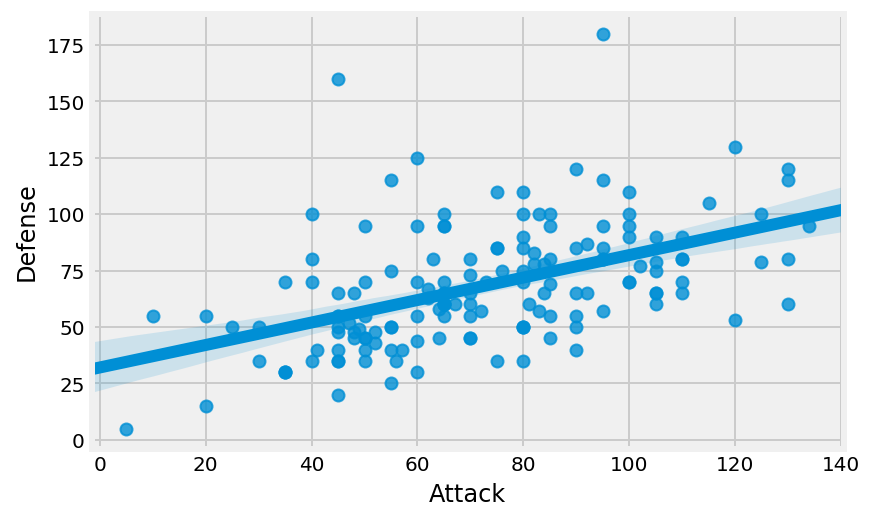

In [5]:
sns.regplot(x='Attack', y='Defense', data=df);

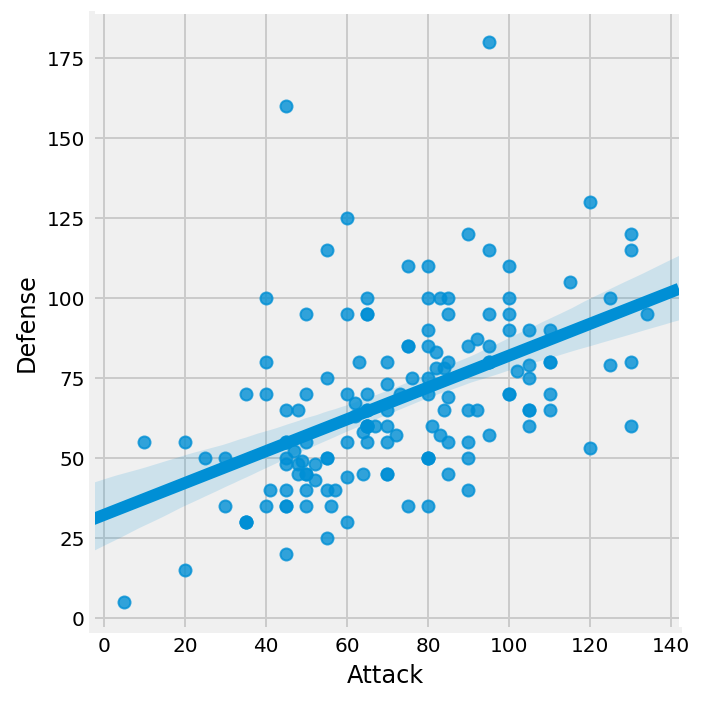

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df);

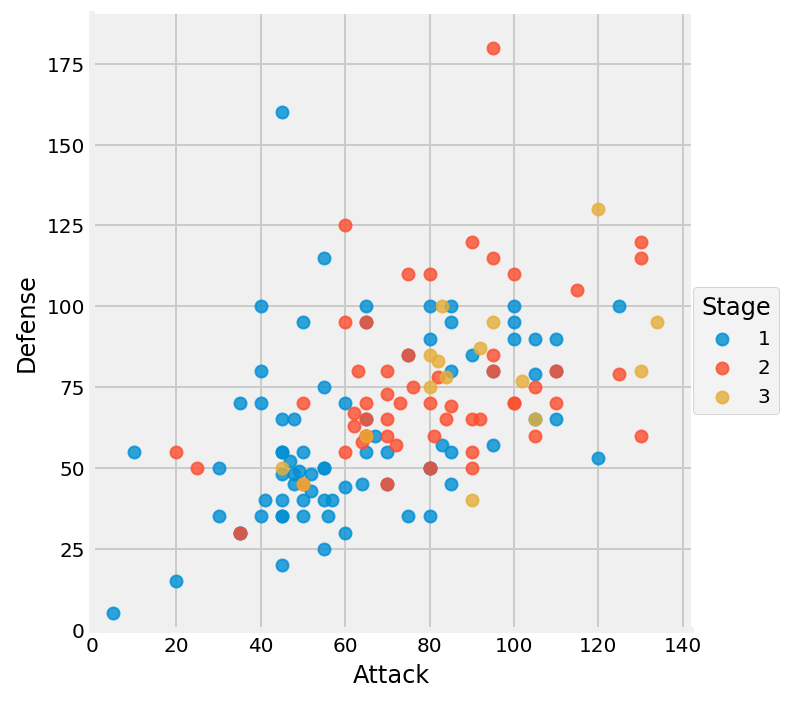

In [8]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage');   # Color by evolution stage
# Set axes to start @ 0, can also  be used to view a subsection
plt.ylim(0, None);
plt.xlim(0, None);# ';' takes care of the ugly '<seaborn.axisgrid.FacetGrid at 0x1a1cae6860>'

Often better to wrangle the data with Pandas first and then plot

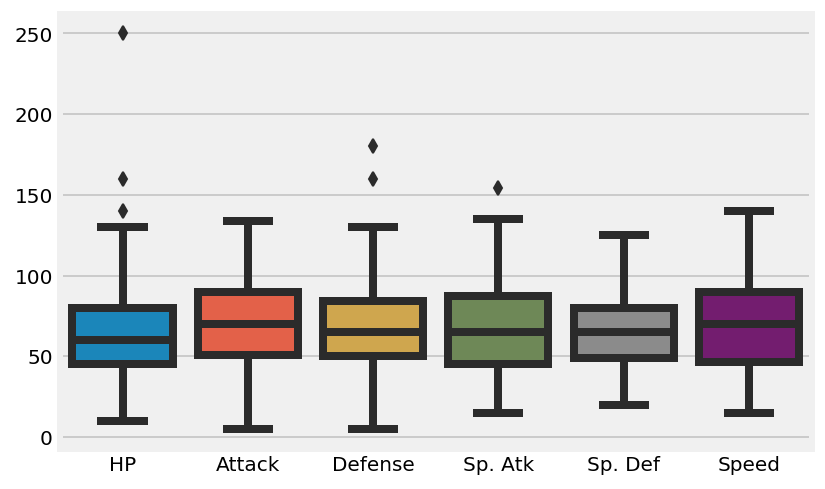

In [9]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df);

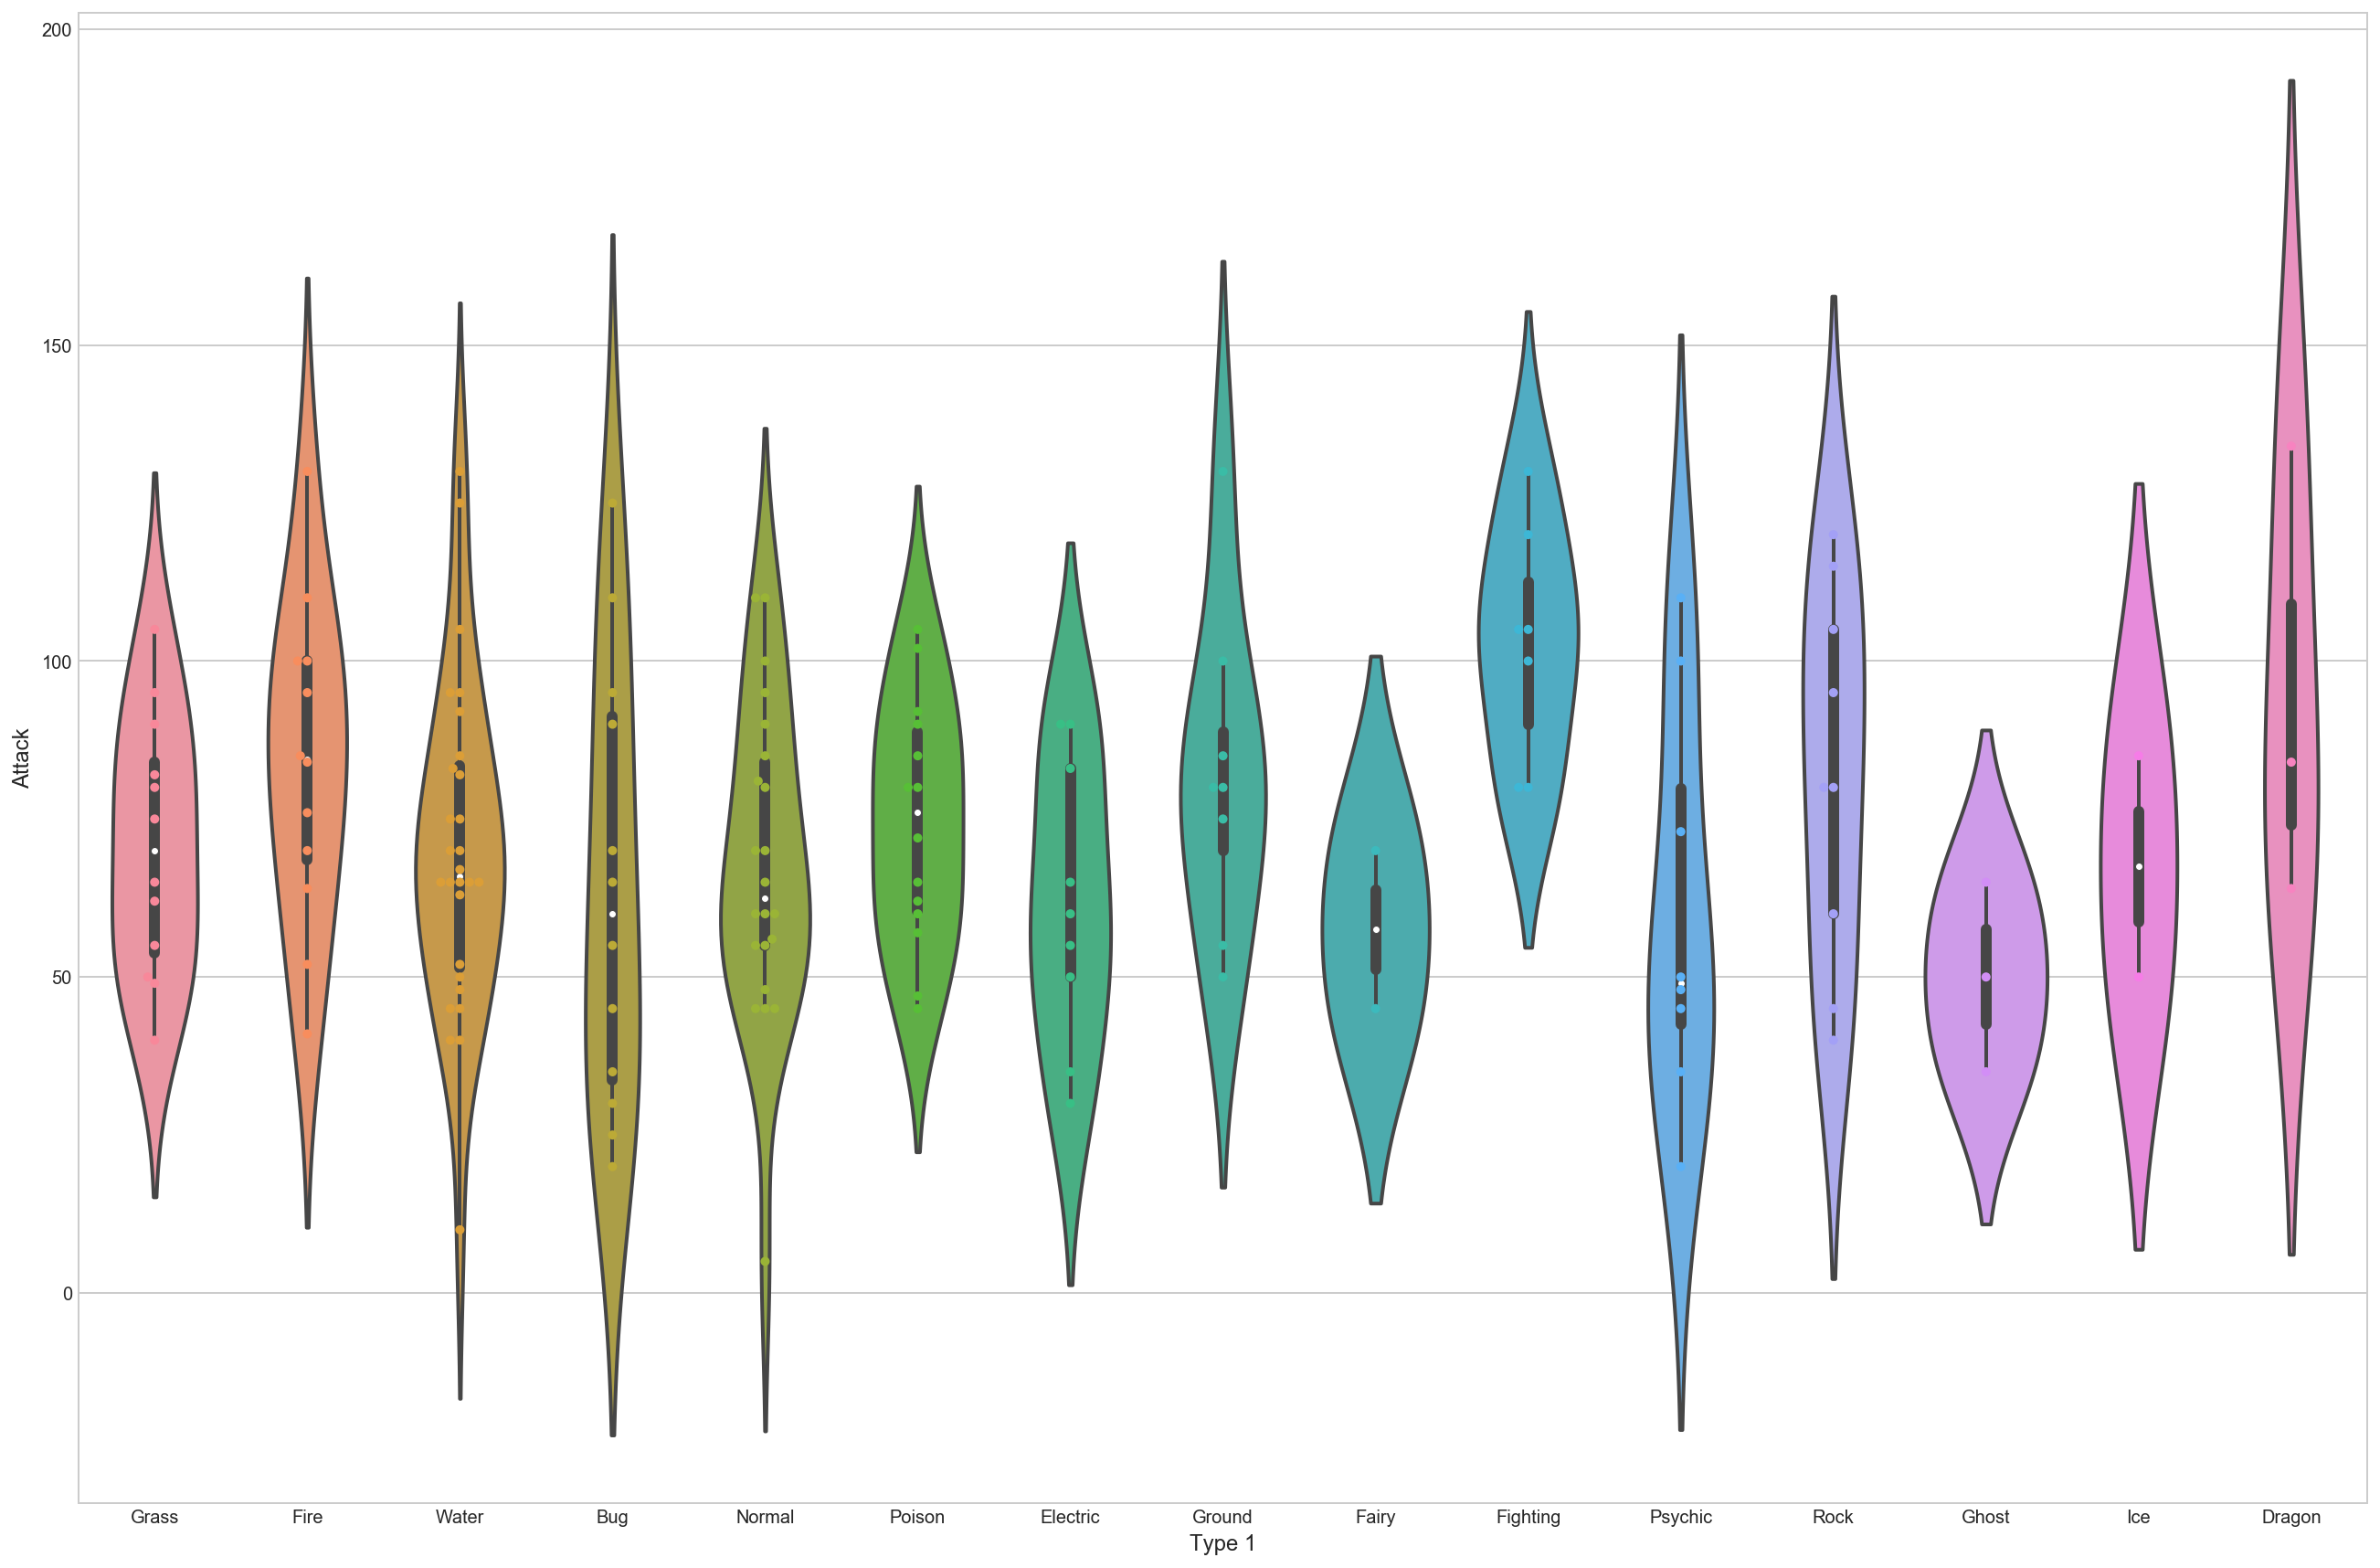

In [23]:
# Set theme
plt.subplots(figsize=(20,15))
sns.set_style('whitegrid')
sns.set_context(rc={"lines.linewidth": 2})
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=stats_df)
sns.swarmplot(x='Type 1', y='Attack', data=df);

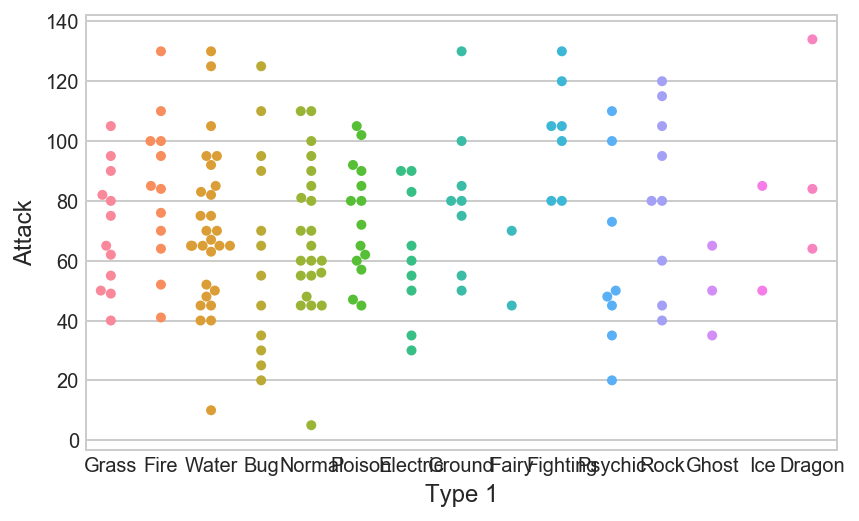

In [24]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df);

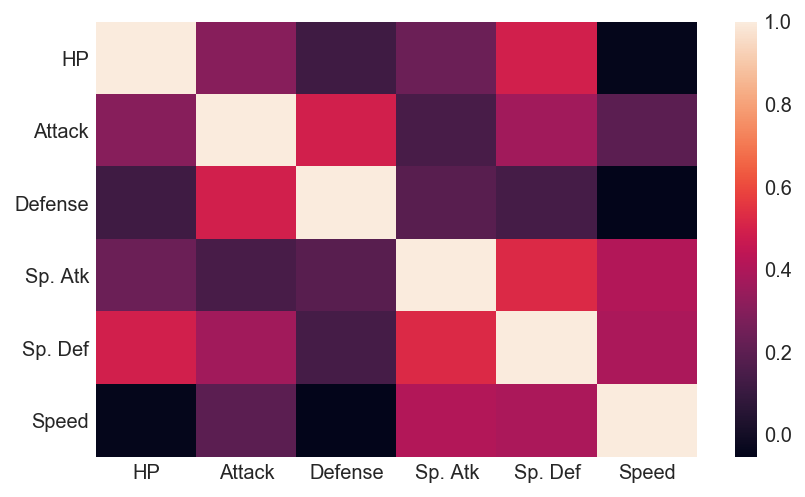

In [97]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
with plt.style.context('seaborn-whitegrid'):
    sns.heatmap(corr);
# Before embarking on a all out cleaning: see what is worthwhile cleaning
# corr = df.corr()['yCol']
# corr[np.argsort(corr, axis=0)[::-1]]

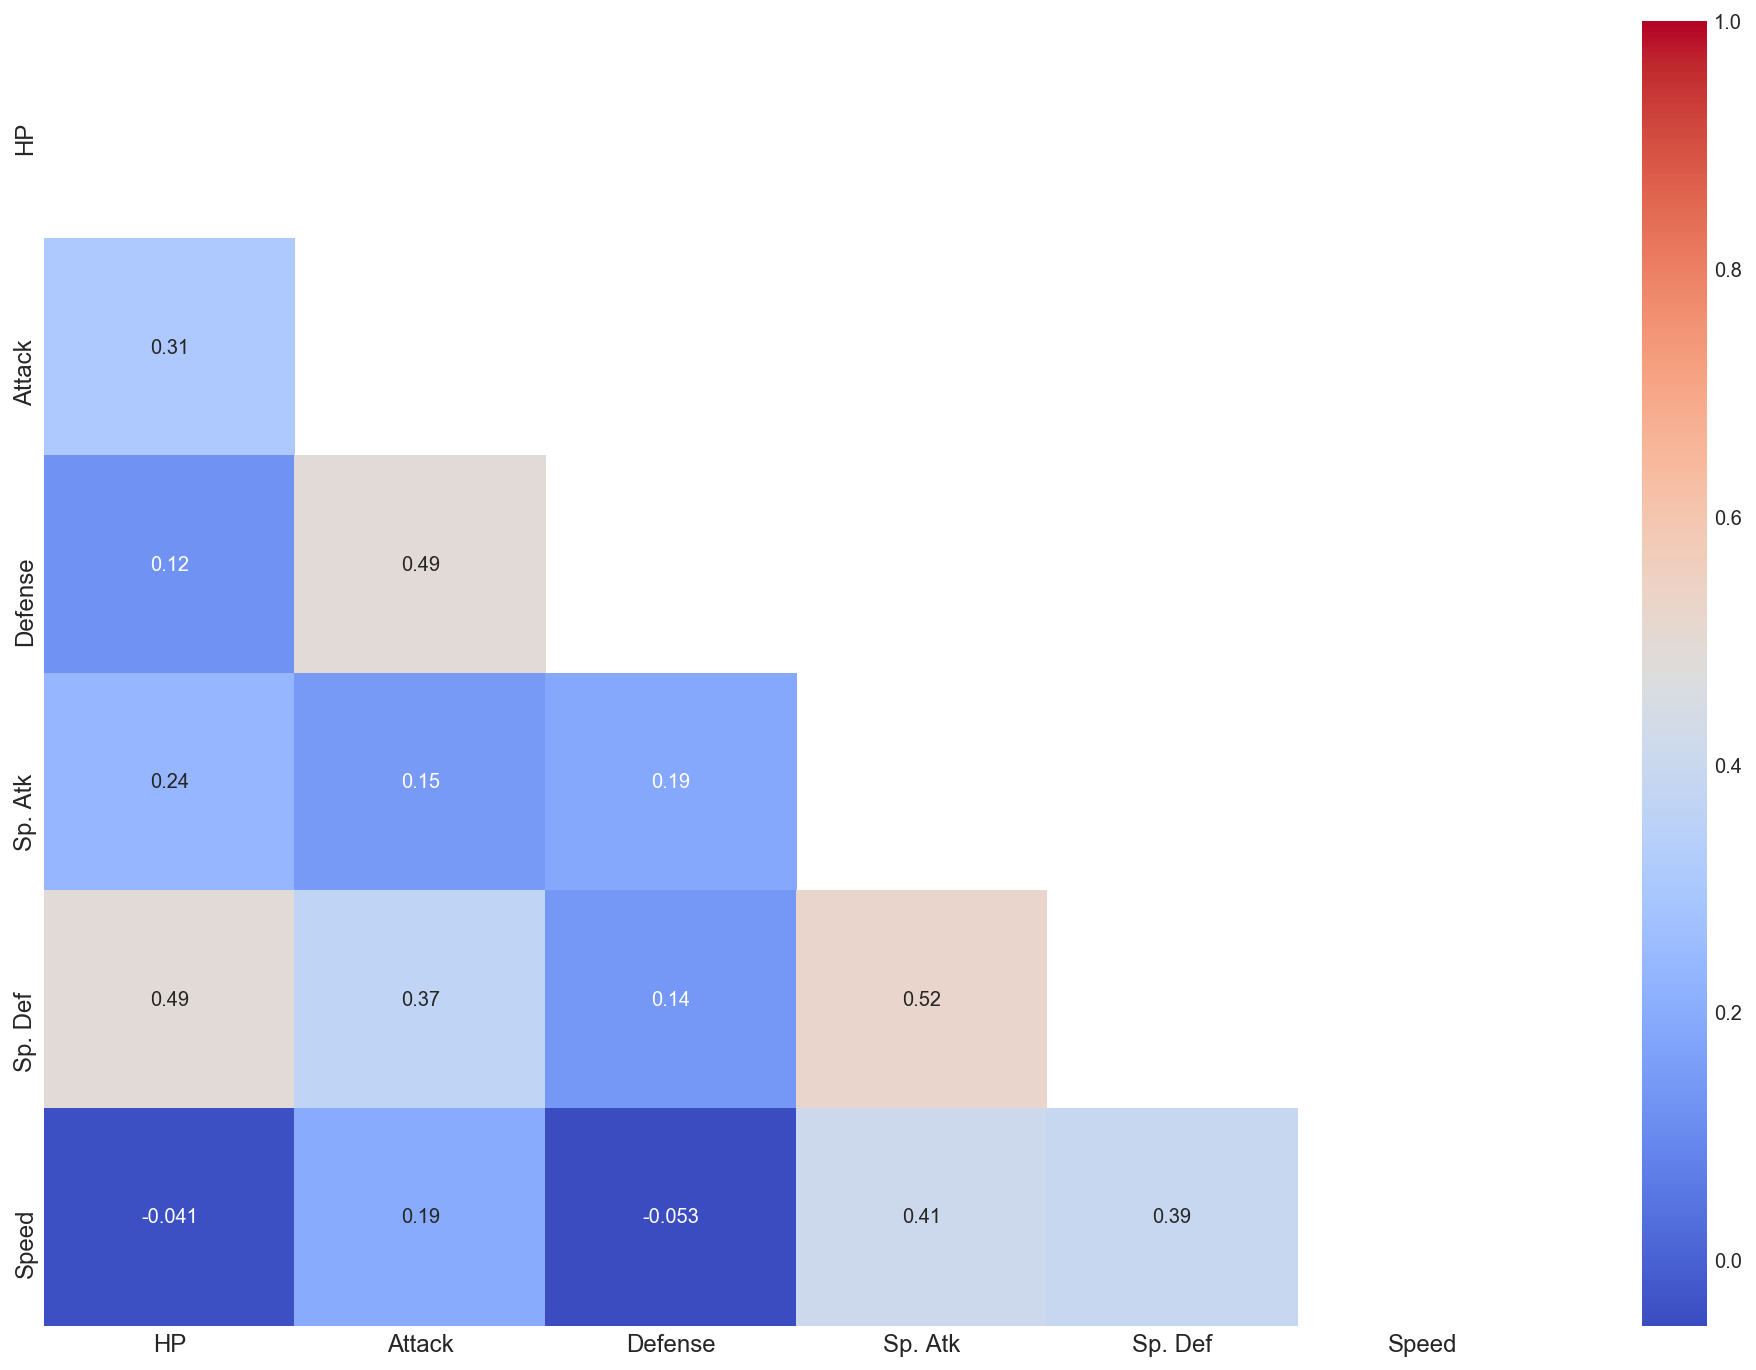

In [95]:
#Create a heatmap using only the variables with a high
fig, ax = plt.subplots(figsize=(15,12))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask,cmap="coolwarm",  ax=ax, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)
plt.show()

In [32]:
df['Attack'] = np.log(df['Attack'])

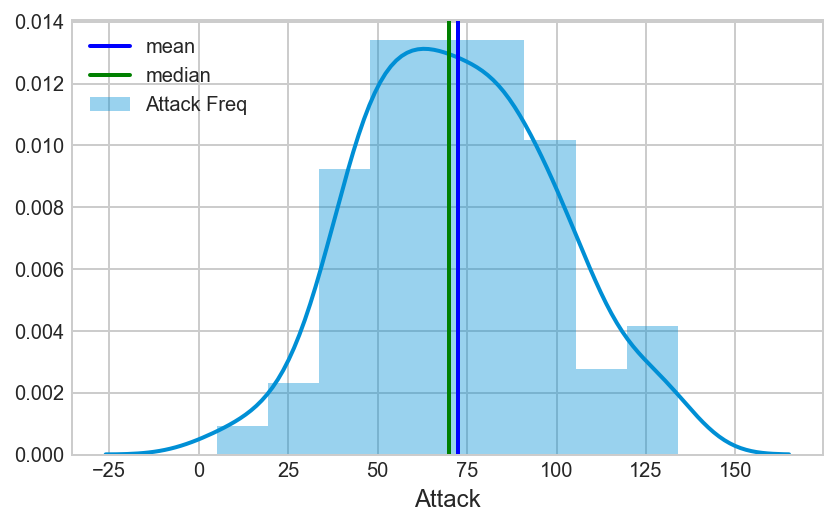

In [262]:
sns.distplot(df['Attack'], label = 'Attack Freq')
plt.axvline(df['Attack'].mean(), label ='mean', color = 'b', lw= 2)
plt.axvline(df['Attack'].median(), label ='median', color = 'g', lw= 2)
plt.legend(loc = 2)
plt.show();

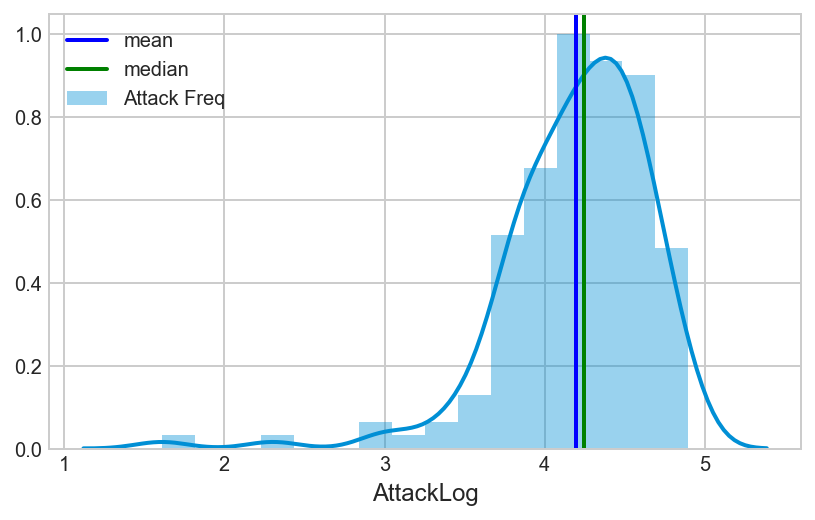

In [264]:
sns.distplot(df['AttackLog'],label = 'Attack Freq')
plt.axvline(df['AttackLog'].mean(), label ='mean', color = 'b', lw= 2)
plt.axvline(df['AttackLog'].median(), label ='median', color = 'g', lw= 2)
plt.legend(loc = 2)
plt.show();

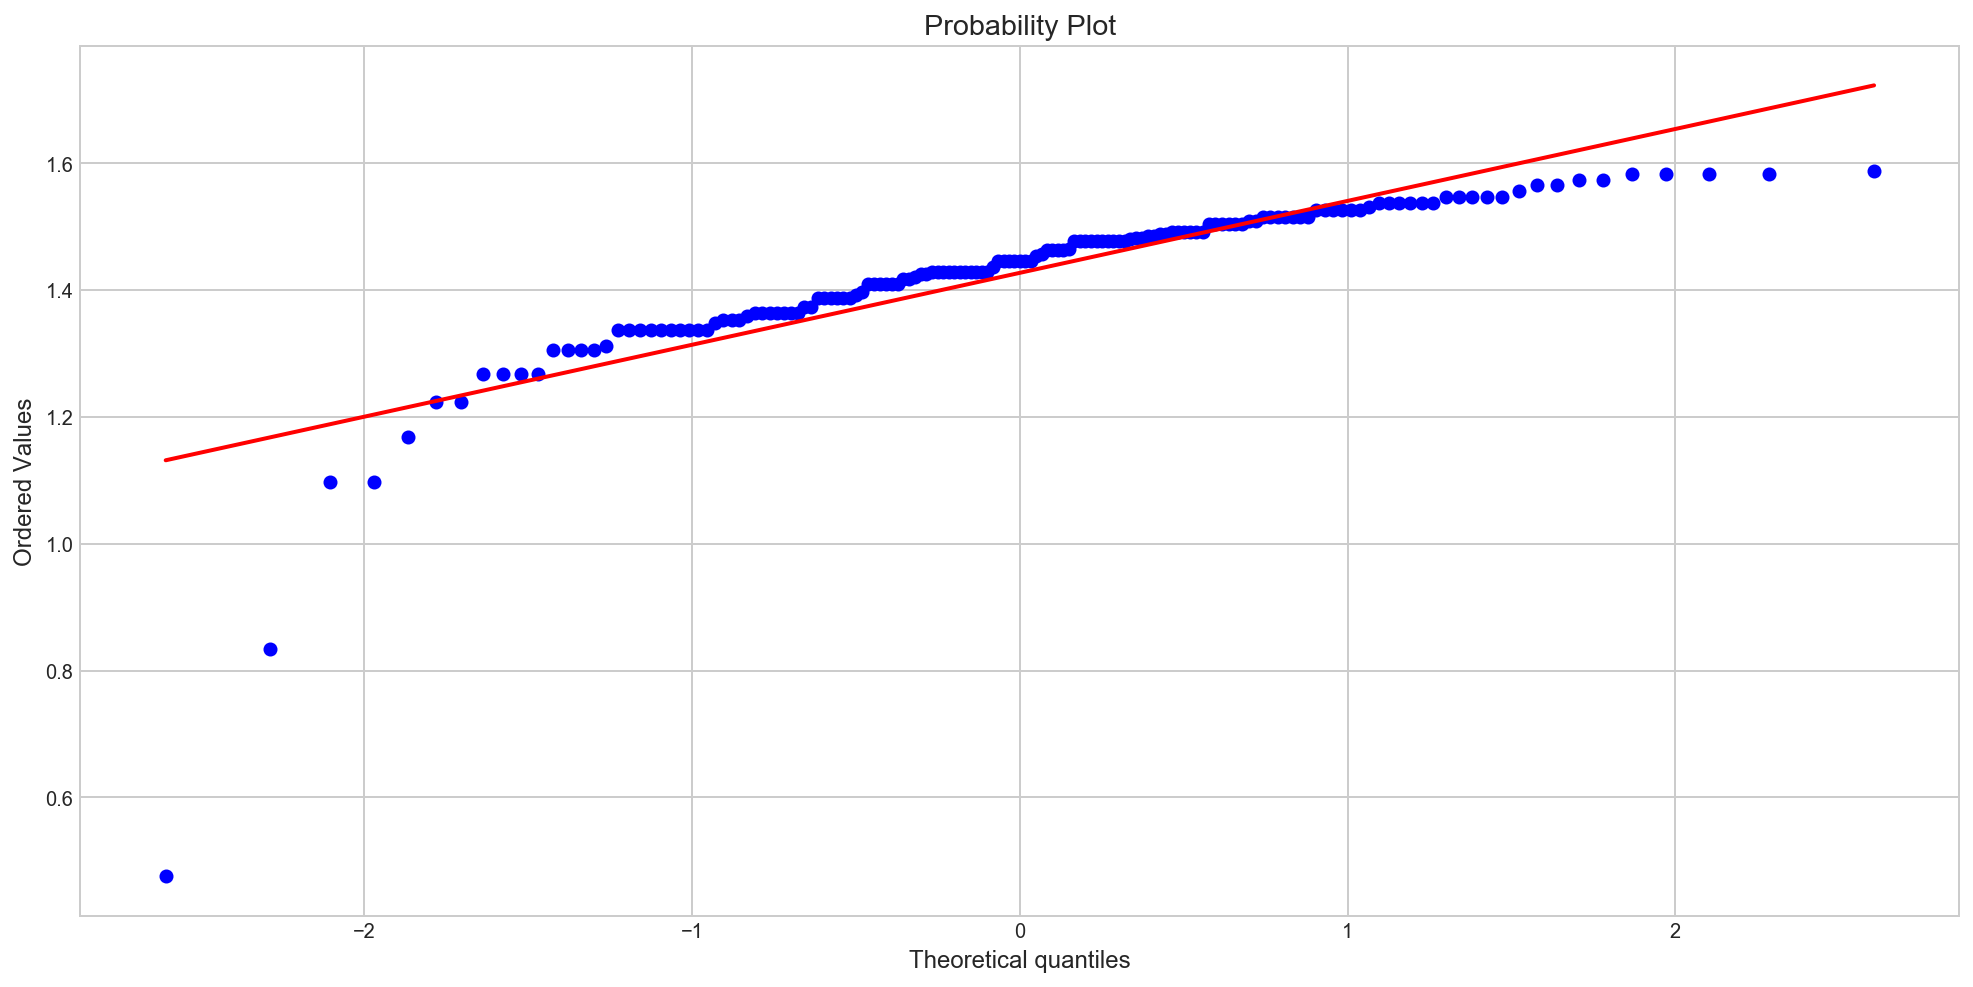

In [41]:
import scipy.stats as stats
fig = plt.figure(figsize=(15, 8))
x = df['Attack']
stats.probplot(x, plot=plt)
plt.show()

Numerical plots,

## Production
### Rerun on full test set
### Predictions
### Pipelines
### Websites

# Maths
## Combinations/Permutations
## Probabilities
### Frequentsis (counters)
### Bayes(believers)
## Matrices

In [43]:
word = 'abcdefghij'
print(word)
print(word[4])
print(word[:4])
print(word[4:])
print(word[2:4])
print(word[2:9:2])
print(word[-4:])
[print(word) for i in word]
[print(i) for i in word]
[print(i[:4]) for i in word]
[print(i) for i in word if i in['c', 'd', 'e']]
[print('yes') for i in word if i in['c', 'd', 'e'] if i in ['c']]
[print('yes') if i in['c', 'd', 'e'] else print(i) for i in word]
lijst = list(word)
print(lijst)

abcdefghij
e
abcd
efghij
cd
cegi
ghij
abcdefghij
abcdefghij
abcdefghij
abcdefghij
abcdefghij
abcdefghij
abcdefghij
abcdefghij
abcdefghij
abcdefghij
a
b
c
d
e
f
g
h
i
j
a
b
c
d
e
f
g
h
i
j
c
d
e
yes
a
b
yes
yes
yes
f
g
h
i
j
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [28]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
ft = FunctionTransformer()

In [35]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X = df.col2.values.reshape(-1, 1)
df['col8'] = pt.fit_transform(X) 
df


,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol,col6,col5,col8
0,row1,1,1.1,-4,excellent,aaa,red,square,1,5,5,-1.712525
1,row2,2,2.2,-3,excellent,bbb,blue,square,1,5,5,-1.253380
2,row3,3,3.3,-2,very good,ccc,green,square,1,4,4,-0.840753
3,row4,4,4.4,-1,very good,ddd,orange,circle,1,4,4,-0.455700
4,row5,5,5.5,0,good,eee,yellow,circle,1,3,3,-0.089934
5,row6,6,6.6,1,good,fff,purple,circle,0,3,3,0.261163
6,row_7,7,7.7,2,fair,ggg,white,triangle,0,2,2,0.600512
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,0,2,2,0.930119
8,Row9,9,9.9,4,appalling,iii,brown,triangle,0,1,1,1.251438
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,0,1,1,1.309060


In [26]:
np.log(100)

4.605170185988092

In [44]:
print(lijst)
lijst.index('g')
print(lijst[4])
print(lijst[:4])
print(lijst[4:])
print(lijst[2:4])
print(lijst[2:9:2])
print(lijst[-4:])
[print(lijst) for i in lijst]
[print(i) for i in lijst]
[print(i[:4]) for i in lijst]
[print(i) for i in lijst if i in['c', 'd', 'e']]
[print('yes') for i in lijst if i in['c', 'd', 'e'] if i in ['c']]
[print('yes') if i in['c', 'd', 'e'] else print(i) for i in lijst]
lol = list(lijst for i in range(3))
lol
print(lol)





['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
e
['a', 'b', 'c', 'd']
['e', 'f', 'g', 'h', 'i', 'j']
['c', 'd']
['c', 'e', 'g', 'i']
['g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
a
b
c
d
e
f
g
h
i
j
a
b
c
d
e
f
g
h
i
j
c
d
e
yes
a
b
yes
yes
yes
f
g
h
i
j
[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']]


In [38]:
lol = [['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
       ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
       ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
       ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
       ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']]
print(lol[2])
print(lol[2][2])
print(lol[2].index('g'))
print(lol[3][::2])
print(lol[3][::-2])
for item in lol:
    print(item)
for item in lol:
    for i in item:
print(i[print(i) for i in lijst if i in['c', 'd', 'e']]


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
c
6
['a', 'c', 'e', 'g', 'i']
['j', 'h', 'f', 'd', 'b']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
a
b
c
d
e
f
g
h
i
j
a
b
c
d
e
f
g
h
i
j
a
b
c
d
e
f
g
h
i
j
a
b
c
d
e
f
g
h
i
j
a
b
c
d
e
f
g
h
i
j


In [29]:
import pandas as pd  # example .apply with custom function
import numpy as np
_arr = np.random.randint(50, size=(4, 5))
df = pd.DataFrame(_arr)


def cube(x):
    return x ** 3


def sqrt_(x):
    return x ** 2


df.loc[:, 4] = df.loc[:, 4].map(sqrt_)
df.apply(cube)

,0,1,2,3,4
0,91125,729,91125,50653,1771561
1,9261,110592,1728,64,7529536
2,68921,0,1728,2197,729
3,2744,8000,42875,8,1073741824


In [2]:
list1 = 1,2,3,4,5
lista = list('abcde')
listc = list('!@#$%')


dicta = {num:letter for  num,letter in zip(list1,lista) if (num < 4) and (letter in 'ab') }
dicta
dictb = {num:letter for  num,letter in zip(list1,lista)}

In [ ]:
dictb = {key:value for key in list1 for value in {}}

In [10]:
{key:value for key in list1 for value in }

{}

In [13]:
{key:{lista[i]:listc[i]} for i,key in enumerate(list1)}

{1: {'a': '!'}, 2: {'b': '@'}, 3: {'c': '#'}, 4: {'d': '$'}, 5: {'e': '%'}}

In [2]:
dict(zip(lista,listc))

{'a': '!', 'b': '@', 'c': '#', 'd': '$', 'e': '%'}

In [9]:
dict(zip(lista,listc))

{'a': '!', 'b': '@', 'c': '#', 'd': '$', 'e': '%'}

In [8]:
dict(zip(list1,dict(zip(lista,listc)).items()))

{1: ('a', '!'), 2: ('b', '@'), 3: ('c', '#'), 4: ('d', '$'), 5: ('e', '%')}

In [59]:
listc

['!', '@', '#', '$', '%']

In [56]:
list1 = ('12345')

In [58]:
eval(list1)

12345

In [4]:
#merge 2 dicts
dictc= {**dicta, **dictb}
dictc

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e'}

In [15]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [16]:
(stats.norm().ppf([0.05,0.95]))

array([-1.64485363,  1.64485363])

In [ ]:
# def item_category_maker(x):
#     x = x.lower() #force lowercase
#     if 'chips' in x:
#         return 'chips'
#     elif ('burrito' in x) or ('bowl' in x):
#         return 'burrito'
#     elif 'taco' in x:
#         return 'taco'
#     elif 'salad' in x:
#         return 'salad'
#     else:
#         return 'drink'# have a left over answer
    
# chip['broad_type'] = chip.item_name.map(item_category_maker)
# print(chip.broad_type.unique())
# print(chip.broad_type.value_counts())

In [ ]:
# Filter on rows
filtering_mask = (earnings['Time'] == 2016) & (earnings['Statistics'] == 'Mean') & (
    earnings['Sex'] == 'All') & (earnings['Workingpattern'] == 'All') & (earnings['Earnings'] == 'Weekly pay - Gross')
earnings_row_filt = earnings[filtering_mask]

#sum(filtering_mask)

# Filter on columns
columns_filt = [column for column in earnings.columns if '_codelist' not in column] 
columns_filt = [column for column in columns_filt if column not in ['Data marking', 
                                                                    'Coefficient of variation',
                                                                    'Sex',
                                                                    'Workingpattern']]
earnings_col_filt = earnings_row_filt[columns_filt]

# Rename columns and reset_index
rename_cols = {'V4_2':'Value',
                 'ashe-geography':'Geography_code'}
earnings_col_filt = earnings_col_filt.rename(rename_cols, axis = 1)
earnings_col_filt = earnings_col_filt.reset_index(drop=True)

In [5]:
import numpy as np
a = np.empty(15,)
a[::2] = 1
a[1::2] = 2
a

array([1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1.])

In [22]:
a = []
for i in range(5):
    a.append(1)
    a.append(2)
a

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

In [18]:
type(a)

list

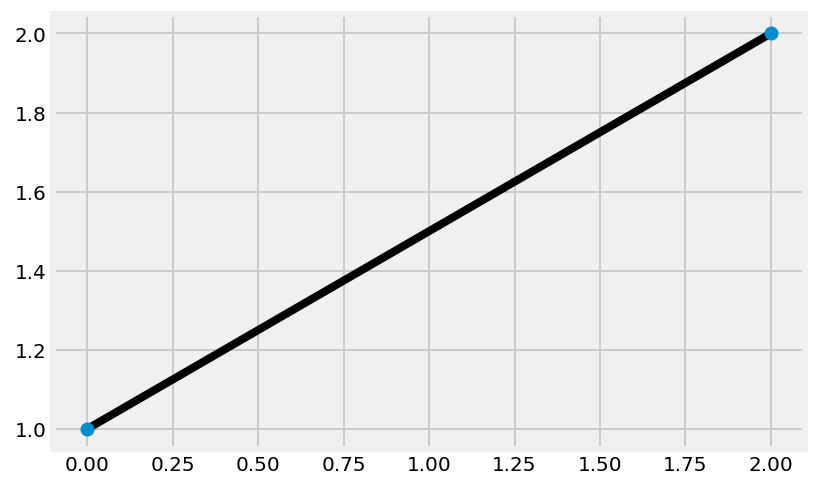

In [1]:
# Draw a straight line
#read the list of points as (x0, x1), (y0, y1)
data = [[0, 2], [1, 2]]

plt.plot(data[0], data[1], "k-")
plt.plot(data[0], data[1], "o")
plt.show()

In [247]:
#Plot x vs y 
df = pd.DataFrame(sample_data, columns=["x", "y"])

# plot the data with regplot
my_plot = df.plot(kind="scatter", x="x", y="y",
                  title="Sample Data", figsize=(10, 5))

# Add value markers because it's nice to have a visual reference to data points
for point in sample_data:
    my_plot.text(point[0] + .2, point[1] - .02, str(point))

sns.regplot(x="x", y="y", data=df)
plt.show()

NameError: name 'sample_data' is not defined

In [ ]:
# simple scatter plot with line
df.plot.scatter(x = 'x', y = 'y')
plt.plot([0,50],[100,100])

In [ ]:
#remove outlier
remove_out = pd.DataFrame({'height':height, 'weight':weight[:,0]})
height_mean = np.mean(height)
height_std = np.std(height)
remove_out['height_outlier'] = (np.abs(remove_out.height - height_mean) > 1.5*height_std)
print (remove_out.height_outlier.sum())

height_no = remove_out.height[~remove_out.height_outlier].values
weight_no = remove_out.weight[~remove_out.height_outlier].values
print (weight_no.shape)
weight_no = weight_no.reshape(weight_no.shape[0], 1)
print (height_no.shape, weight_no.shape)

In [ ]:
#trick to split ascci data
# Load the diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target
# Take a look at the data again
print(df.head())
print(df.shape)

In [ ]:
bcw['bare_nuclei'] = bcw.bare_nuclei.map(lambda x: int(x) if not x == '?' else np.nan)
bcw.dropna(inplace=True)

In [ ]:
y = hsq['gender']# !!! column
X = hsq[predictors] #!!!list

In [ ]:
# new colum with 0 and 1's
data['host_wins'] = (data['HostName'] == data['winner']).astype(int)

In [ ]:
# create a folder "app"
import os
folder_ = "./app"
if not os.path.exists(folder_):
    os.makedirs(folder_)